In [21]:
!pip install torch

^C


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Parameters
L = 20.0  # Domain length
N = 256  # Number of grid points
dx = L / N  # Spatial resolution
x = np.linspace(-L/2, L/2, N, endpoint=False)  # Spatial domain
dt = 0.001  # Time step
tmax = 2.0  # Maximum time
steps = int(tmax / dt)  # Total number of time steps

# Wavenumbers for spectral derivatives
k = (2 * np.pi / L) * np.fft.fftfreq(N) * N
k3 = k**3

# Initial condition (e.g., a soliton)
U0 = np.cosh(x)**(-2)

# Fourier transform of the initial condition
U_hat = np.fft.fft(U0)

# Leapfrog time-stepping initialization
U_prev = U_hat  # Initialize with the first time step
U = U_hat.copy()  # Current step

# Store results for visualization
results = []
time_points = []

In [9]:
for n in range(steps):
    # Compute derivatives in spectral space
    Ux_hat = 1j * k * U
    Uxxx_hat = -1j * k3 * U
    
    # Inverse Fourier transform to compute nonlinear term
    Ux = np.fft.ifft(Ux_hat)
    Uxxx = np.fft.ifft(Uxxx_hat)
    U_phys = np.fft.ifft(U)
    
    # Nonlinear term
    nonlinear_term = U_phys * Ux
    
    # Compute Fourier transform of the nonlinear term
    nonlinear_term_hat = np.fft.fft(nonlinear_term)
    
    # Leapfrog time step
    if n == 0:  # First step uses a forward Euler method
        U_next = U + dt * (-nonlinear_term_hat - Uxxx_hat)
    else:
        U_next = U_prev - 2 * dt * (-nonlinear_term_hat - Uxxx_hat)
    
    # Update steps
    U_prev = U
    U = U_next
    
    # Save results every 50 steps
    if n % 50 == 0:
        results.append(np.fft.ifft(U).real)
        time_points.append(n * dt)

C:\Users\77003\AppData\Local\Temp\ipykernel_6540\2505556669.py:12: RuntimeWarning: overflow encountered in multiply
  nonlinear_term = U_phys * Ux
C:\Users\77003\AppData\Local\Temp\ipykernel_6540\2505556669.py:12: RuntimeWarning: invalid value encountered in multiply
  nonlinear_term = U_phys * Ux


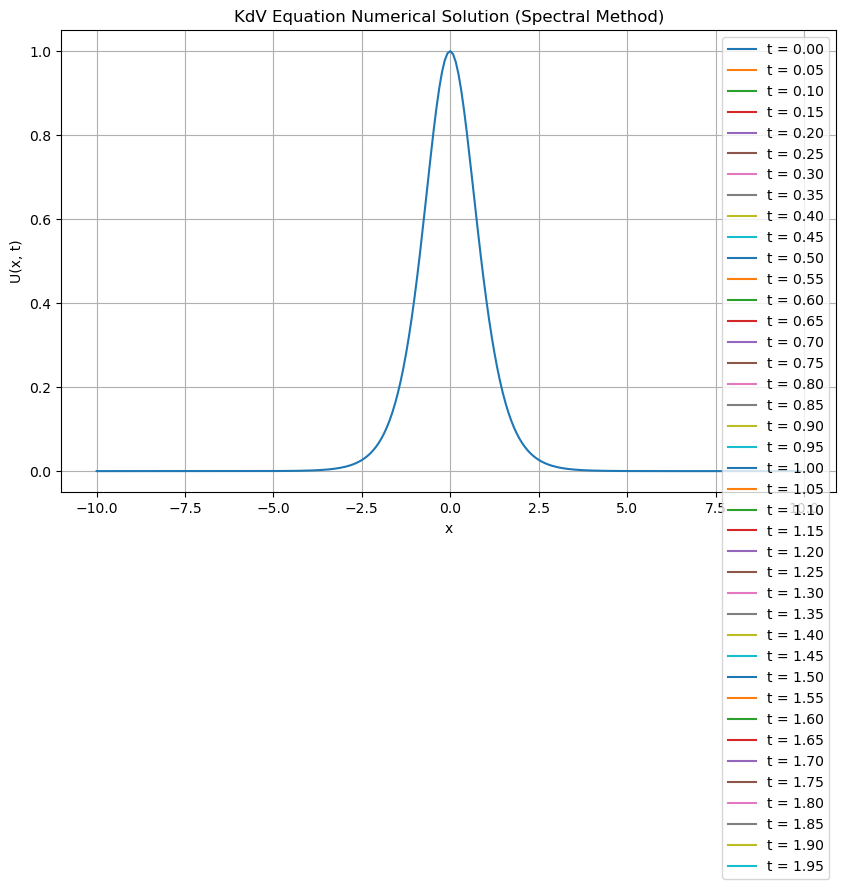

In [10]:
# Visualization
plt.figure(figsize=(10, 6))
for i, result in enumerate(results):
    plt.plot(x, result, label=f"t = {time_points[i]:.2f}")
plt.xlabel("x")
plt.ylabel("U(x, t)")
plt.title("KdV Equation Numerical Solution (Spectral Method)")
plt.legend()
plt.grid()
plt.show()

C:\Users\77003\AppData\Local\Temp\ipykernel_6540\1642570548.py:44: RuntimeWarning: overflow encountered in multiply
  nonlinear_term = U_phys * Ux
C:\Users\77003\AppData\Local\Temp\ipykernel_6540\1642570548.py:44: RuntimeWarning: invalid value encountered in multiply
  nonlinear_term = U_phys * Ux


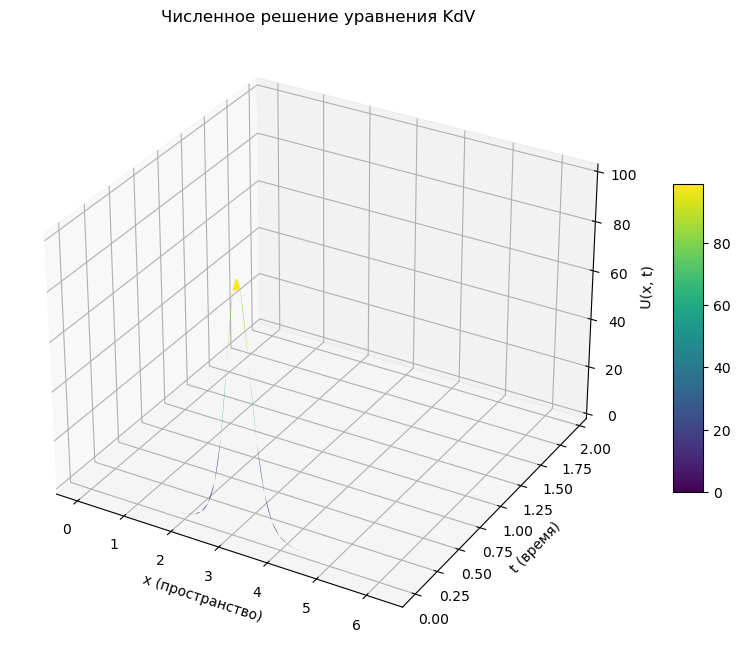

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметры
L = 2 * np.pi  # Длина области
N = 256  # Количество точек сетки
dx = L / N  # Пространственное разрешение
x = np.linspace(0, L, N, endpoint=False)  # Пространственная область
dt = 0.001  # Шаг по времени
tmax = 2.0  # Максимальное время
steps = int(tmax / dt)  # Общее количество временных шагов
A = 100  # Амплитуда

# Волновые числа
k = np.fft.fftfreq(N, d=dx) * 2 * np.pi
k3 = k**3

# Начальное условие
U0 = A * (1 / np.cosh(np.sqrt(A / 12) * (x - np.pi)))**2

# Преобразование Фурье начального условия
U_hat = np.fft.fft(U0)

# Инициализация временного шага
U_prev = U_hat
U = U_hat.copy()

# Хранение результатов
results = []
time_points = []

for n in range(steps):
    # Вычисление производных в спектральной области
    Ux_hat = 1j * k * U
    Uxxx_hat = -1j * k3 * U

    # Обратное преобразование Фурье
    U_phys = np.fft.ifft(U)
    Ux = np.fft.ifft(Ux_hat)
    Uxxx = np.fft.ifft(Uxxx_hat)

    # Нелинейное слагаемое
    nonlinear_term = U_phys * Ux
    nonlinear_term_hat = np.fft.fft(nonlinear_term)

    # Leapfrog шаг
    if n == 0:  # Первый шаг методом Эйлера
        U_next = U + dt * (-nonlinear_term_hat - Uxxx_hat)
    else:
        U_next = U_prev - 2 * dt * (-nonlinear_term_hat - Uxxx_hat)

    # Обновление шагов
    U_prev = U
    U = U_next

    # Сохранение результата каждые 50 шагов
    if n % 50 == 0:
        results.append(np.fft.ifft(U).real)
        time_points.append(n * dt)

# Преобразование данных для 3D-графика
X, T = np.meshgrid(x, time_points)
U = np.array(results)

# Визуализация в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, U, cmap='viridis', edgecolor='none')

ax.set_xlabel("x (пространство)")
ax.set_ylabel("t (время)")
ax.set_zlabel("U(x, t)")
ax.set_title("Численное решение уравнения KdV")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()


C:\Users\77003\AppData\Local\Temp\ipykernel_6540\1545553763.py:48: RuntimeWarning: overflow encountered in multiply
  nonlinear_term = U_phys * Ux
C:\Users\77003\AppData\Local\Temp\ipykernel_6540\1545553763.py:48: RuntimeWarning: invalid value encountered in multiply
  nonlinear_term = U_phys * Ux


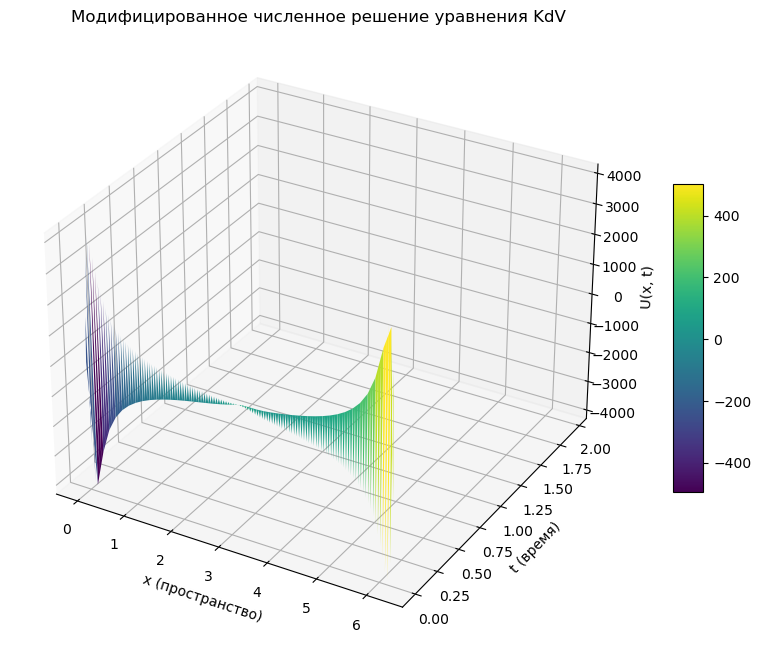

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметры
L = 2 * np.pi  # Длина области
N = 256  # Количество точек сетки
dx = L / N  # Пространственное разрешение
x = np.linspace(0, L, N, endpoint=False)  # Пространственная область
dt = 0.001  # Шаг по времени
tmax = 2.0  # Максимальное время
steps = int(tmax / dt)  # Общее количество временных шагов
A = 100  # Амплитуда

# Волновые числа
k = np.fft.fftfreq(N, d=dx) * 2 * np.pi
k3 = k**3

# Начальное условие
U0 = A * (1 / np.cosh(np.sqrt(A / 12) * (x - np.pi)))**2

# Преобразование Фурье начального условия
U_hat = np.fft.fft(U0)

# Инициализация временного шага
U_prev = U_hat.copy()
U = U_hat.copy()

# Хранение результатов
results = []
time_points = []

# Функция для модификации синусного члена
def sin_term(v3, dt):
    return v3 * dt - (v3 * dt)**3 / 6 + (v3 * dt)**5 / 120

# Основной цикл по времени
for n in range(steps):
    # Вычисление производных в спектральной области
    Ux_hat = 1j * k * U
    Uxxx_hat = -1j * sin_term(k3, dt) * U

    # Обратное преобразование Фурье
    U_phys = np.fft.ifft(U)
    Ux = np.fft.ifft(Ux_hat)

    # Нелинейное слагаемое
    nonlinear_term = U_phys * Ux
    nonlinear_term_hat = np.fft.fft(nonlinear_term)

    # Leapfrog шаг
    if n == 0:  # Первый шаг методом Эйлера
        U_next = U + dt * (-nonlinear_term_hat - Uxxx_hat)
    else:
        U_next = U_prev - 2 * dt * (-nonlinear_term_hat - Uxxx_hat)

    # Обновление шагов
    U_prev = U
    U = U_next

    # Сохранение результата каждые 50 шагов
    if n % 50 == 0:
        results.append(np.fft.ifft(U).real)
        time_points.append(n * dt)

# Преобразование данных для 3D-графика
X, T = np.meshgrid(x, time_points)
U = np.array(results)

# Визуализация в 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, U, cmap='viridis', edgecolor='none')

ax.set_xlabel("x (пространство)")
ax.set_ylabel("t (время)")
ax.set_zlabel("U(x, t)")
ax.set_title("Модифицированное численное решение уравнения KdV")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()


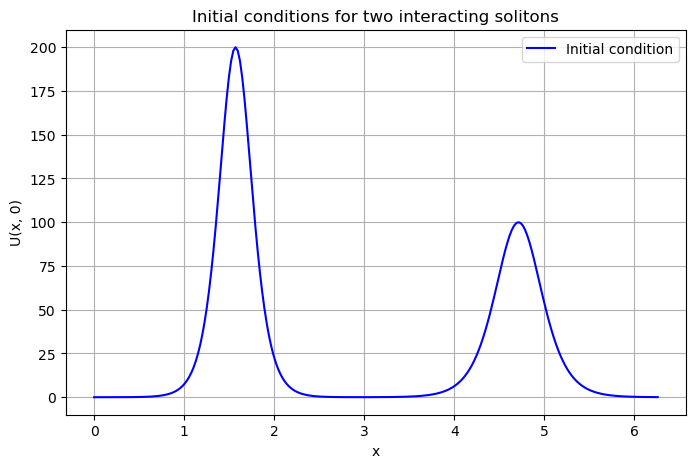

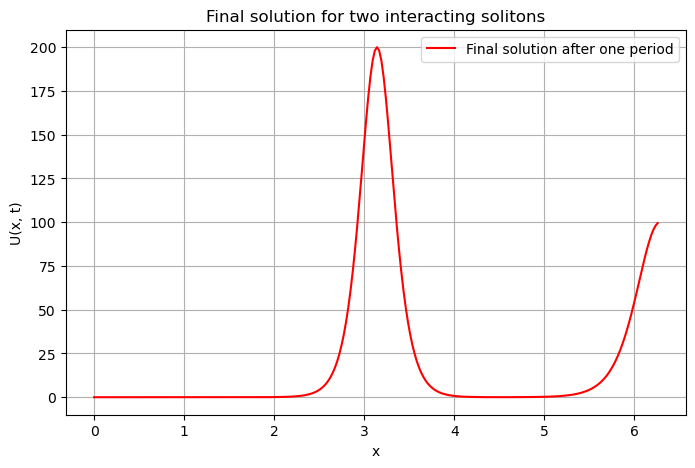

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 2 * np.pi  # Spatial domain length
N = 256  # Number of grid points
dx = L / N  # Grid spacing
x = np.linspace(0, L, N, endpoint=False)  # Spatial grid
A = 100  # Amplitude of the solitons

# Initial conditions for two solitons
U0 = A * (1 / np.cosh(np.sqrt(A / 12) * (x - 3 * np.pi / 2)))**2 \
     + 2 * A * (1 / np.cosh(np.sqrt(2 * A / 12) * (x - np.pi / 2)))**2

# Plot initial condition
plt.figure(figsize=(8, 5))
plt.plot(x, U0, label="Initial condition", color='blue')
plt.title("Initial conditions for two interacting solitons")
plt.xlabel("x")
plt.ylabel("U(x, 0)")
plt.grid(True)
plt.legend()
plt.show()

# Example of numerical solution (you would integrate this using your method)
# For demonstration, we assume the interaction occurs at one period of time
# For simplicity, this is just a snapshot, you need to apply your method to get the full solution

# Example: Final solution (modify this as per your simulation)
U_final = A * (1 / np.cosh(np.sqrt(A / 12) * (x - 2 * np.pi)))**2 \
          + 2 * A * (1 / np.cosh(np.sqrt(2 * A / 12) * (x - np.pi)))**2

# Plot final solution
plt.figure(figsize=(8, 5))
plt.plot(x, U_final, label="Final solution after one period", color='red')
plt.title("Final solution for two interacting solitons")
plt.xlabel("x")
plt.ylabel("U(x, t)")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\77003\AppData\Local\Temp\ipykernel_6540\2431410303.py:49: RuntimeWarning: overflow encountered in multiply
  nonlinear_term = U_phys * Ux
C:\Users\77003\AppData\Local\Temp\ipykernel_6540\2431410303.py:49: RuntimeWarning: invalid value encountered in multiply
  nonlinear_term = U_phys * Ux


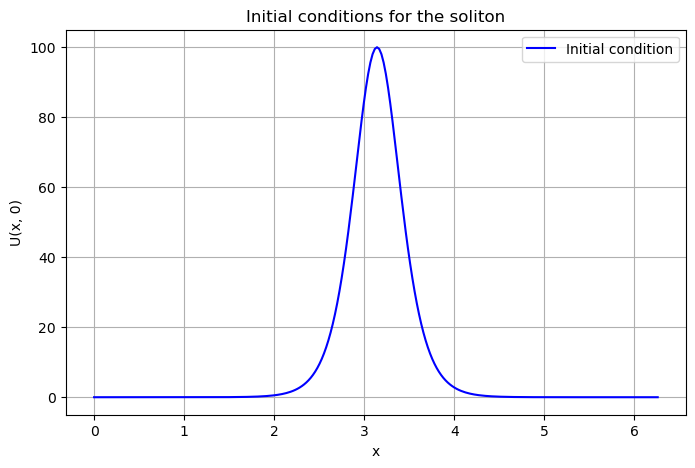

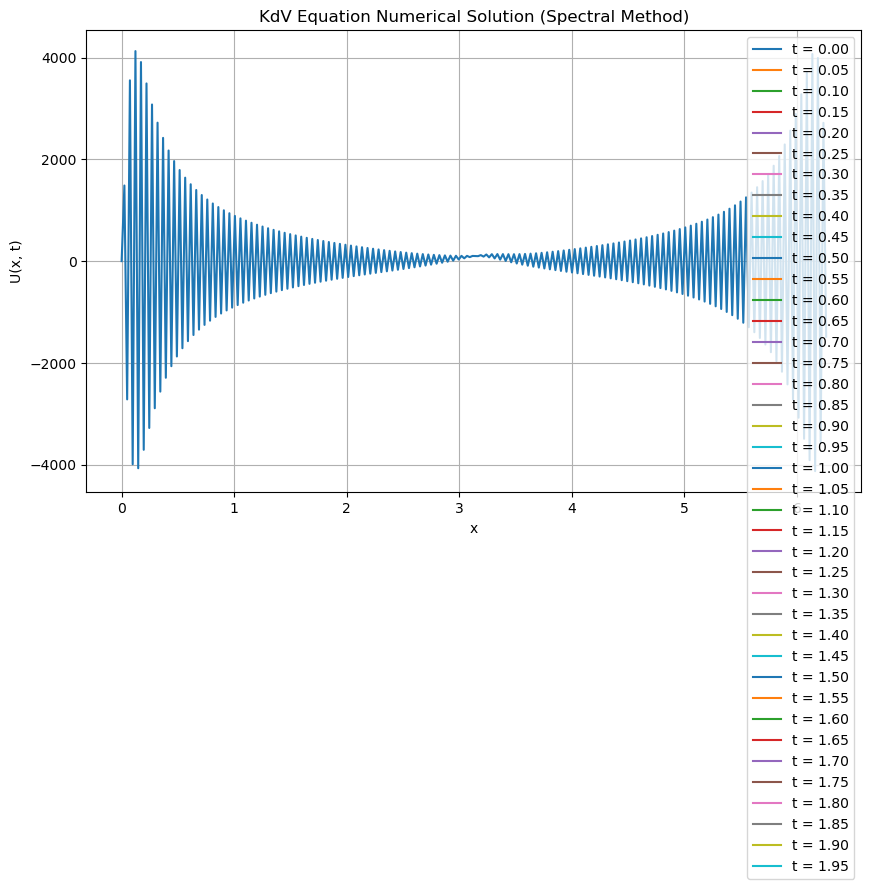

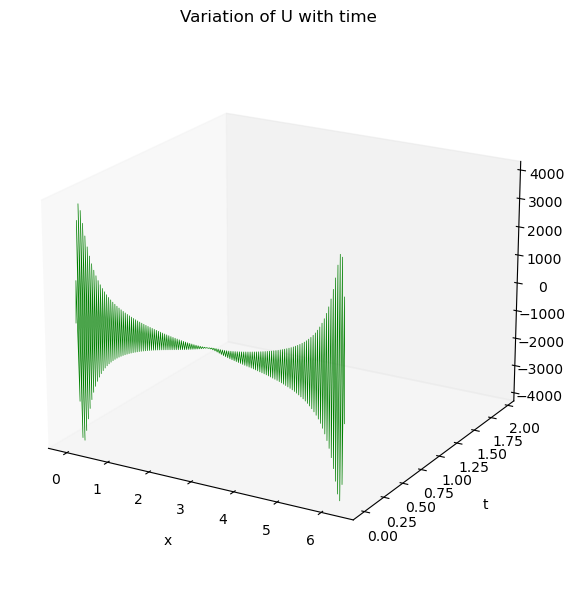

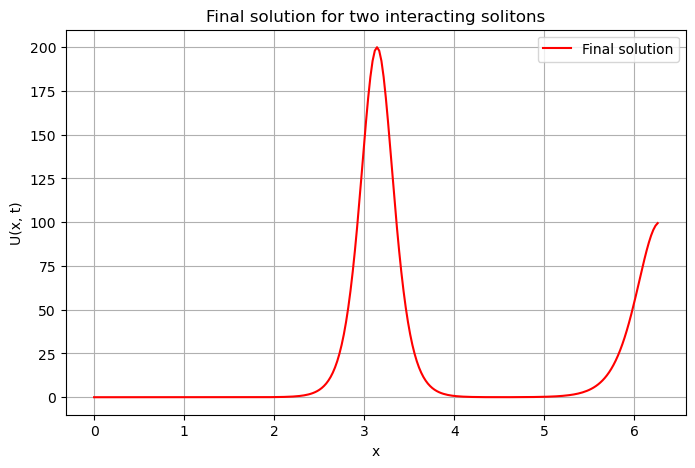

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class KdV_Solver:
    def __init__(self, L=2 * np.pi, N=256, dt=0.001, tmax=2.0, A=100):
        self.L = L  # Длина области
        self.N = N  # Количество точек сетки
        self.dx = L / N  # Пространственное разрешение
        self.x = np.linspace(0, L, N, endpoint=False)  # Пространственная область
        self.dt = dt  # Шаг по времени
        self.tmax = tmax  # Максимальное время
        self.steps = int(tmax / dt)  # Общее количество временных шагов
        self.A = A  # Амплитуда

        # Волновые числа
        self.k = np.fft.fftfreq(N, d=self.dx) * 2 * np.pi
        self.k3 = self.k**3

        # Начальное условие
        self.U0 = self.A * (1 / np.cosh(np.sqrt(self.A / 12) * (self.x - np.pi)))**2
        # Преобразование Фурье начального условия
        self.U_hat = np.fft.fft(self.U0)

        # Инициализация временного шага
        self.U_prev = self.U_hat.copy()
        self.U = self.U_hat.copy()

        # Хранение результатов
        self.results = []
        self.time_points = []

    # Модификация синусного члена
    def sin_term(self, v3, dt):
        return v3 * dt - (v3 * dt)**3 / 6 + (v3 * dt)**5 / 120

    # Решение уравнения KdV
    def solve(self):
        for n in range(self.steps):
            # Вычисление производных в спектральной области
            Ux_hat = 1j * self.k * self.U
            Uxxx_hat = -1j * self.sin_term(self.k3, self.dt) * self.U

            # Обратное преобразование Фурье
            U_phys = np.fft.ifft(self.U)
            Ux = np.fft.ifft(Ux_hat)

            # Нелинейное слагаемое
            nonlinear_term = U_phys * Ux
            nonlinear_term_hat = np.fft.fft(nonlinear_term)

            # Leapfrog шаг
            if n == 0:  # Первый шаг методом Эйлера
                U_next = self.U + self.dt * (-nonlinear_term_hat - Uxxx_hat)
            else:
                U_next = self.U_prev - 2 * self.dt * (-nonlinear_term_hat - Uxxx_hat)

            # Обновление шагов
            self.U_prev = self.U
            self.U = U_next

            # Сохранение результата каждые 50 шагов
            if n % 50 == 0:
                self.results.append(np.fft.ifft(self.U).real)
                self.time_points.append(n * self.dt)

    def plot_initial_condition(self):
        # Начальное условие
        plt.figure(figsize=(8, 5))
        plt.plot(self.x, self.U0, label="Initial condition", color='blue')
        plt.title("Initial conditions for the soliton")
        plt.xlabel("x")
        plt.ylabel("U(x, 0)")
        plt.grid(True)
        plt.legend()
        plt.show()

    def plot_2d_results(self):
        # Визуализация 2D графика
        plt.figure(figsize=(10, 6))
        for i, result in enumerate(self.results):
            plt.plot(self.x, result, label=f"t = {self.time_points[i]:.2f}")
        plt.xlabel("x")
        plt.ylabel("U(x, t)")
        plt.title("KdV Equation Numerical Solution (Spectral Method)")
        plt.legend()
        plt.grid()
        plt.show()

    def plot_3d_results(self):
        # Преобразование данных для 3D-графика
        X, T = np.meshgrid(self.x, self.time_points)
        U = np.array(self.results)

        # Создание фигуры
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')

        # Поверхность с тонкой сеткой
        ax.plot_wireframe(X, T, U, color='green', linewidth=0.5)

        # Оси и заголовки
        ax.set_xlabel("x", fontsize=10, labelpad=10)
        ax.set_ylabel("t", fontsize=10, labelpad=10)
        ax.set_zlabel("U", fontsize=10, labelpad=10)
        ax.set_title("Variation of U with time", fontsize=12, pad=15)

        # Настройка камеры
        ax.view_init(elev=20, azim=-60)  # Угол обзора

        # Дополнительная сетка и параметры для чистого вида
        ax.grid(False)

        plt.tight_layout()
        plt.show()


    def plot_final_condition(self):
        # Пример финального решения
        U_final = self.A * (1 / np.cosh(np.sqrt(self.A / 12) * (self.x - 2 * np.pi)))**2 \
                  + 2 * self.A * (1 / np.cosh(np.sqrt(2 * self.A / 12) * (self.x - np.pi)))**2

        # Отображение финального состояния
        plt.figure(figsize=(8, 5))
        plt.plot(self.x, U_final, label="Final solution", color='red')
        plt.title("Final solution for two interacting solitons")
        plt.xlabel("x")
        plt.ylabel("U(x, t)")
        plt.grid(True)
        plt.legend()
        plt.show()

# Создание объекта и решение уравнения KdV
kdv_solver = KdV_Solver()
kdv_solver.solve()

# Отображение графиков
kdv_solver.plot_initial_condition()
kdv_solver.plot_2d_results()
kdv_solver.plot_3d_results()
kdv_solver.plot_final_condition()


Iteration: 0, Loss: 0.02231098711490631
Iteration: 100, Loss: 1.0924989055638434e-06
Iteration: 200, Loss: 6.251977993088076e-07
Iteration: 300, Loss: 4.295550866117992e-07
Iteration: 400, Loss: 3.1946757417244953e-07
Shape of U: (10000, 1)


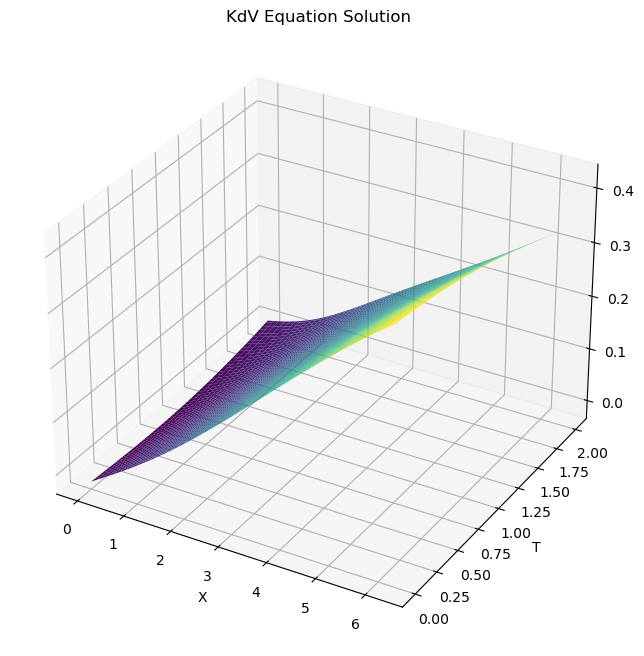

In [45]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

class KdV_PINN:
    def __init__(self, L=2*np.pi, N=100, dt=0.001, tmax=2.0, layers=[1, 50, 50, 50, 1]):
        self.L = L  # Length of the domain
        self.N = N  # Number of grid points
        self.dx = L / N  # Spatial resolution
        self.x = np.linspace(0, L, N, endpoint=False)  # Spatial grid
        self.dt = dt  # Time step
        self.tmax = tmax  # Maximum time
        self.steps = int(tmax / dt)  # Total number of time steps
        self.layers = layers  # Neural network layers

        # Initialize the neural network
        self.model = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(2,)),  # Input layer (2 inputs: x and t)
            tf.keras.layers.Dense(50, activation='tanh'),
            tf.keras.layers.Dense(50, activation='tanh'),
            tf.keras.layers.Dense(1)  # Output layer
        ])

        # Define optimizer
        self.optimizer = tf.keras.optimizers.Adam()

    def u_analytical(self, x, t):
        """Analytical solution for the initial condition (soliton)."""
        A = 100
        return A * (1 / np.cosh(np.sqrt(A / 12) * (x - np.pi)))**2

    def compute_residual(self, x, t):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x)
            tape.watch(t)

            # Neural network prediction for u(x,t)
            u = self.model(tf.concat([x, t], axis=1))

            # Compute the gradients of u with respect to x
            u_x = tape.gradient(u, x)

            # Compute the third derivative of u with respect to x
            u_xx = tape.gradient(u_x, x)
            u_xxx = tape.gradient(u_xx, x)

            # Compute the partial derivative of u with respect to t
            u_t = tape.gradient(u, t)

        # Return the KdV residual: u_t + u * u_x + u_xxx
        residual = u_t + u * u_x + u_xxx

        return residual

    def loss_function(self, x, t):
        residual = self.compute_residual(x, t)
        return tf.reduce_mean(tf.square(residual))

    def train_step(self, x, t):
        with tf.GradientTape() as tape:
            loss_value = self.loss_function(x, t)
        gradients = tape.gradient(loss_value, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
        return loss_value

    def train(self, n_iter):
        # Create training grid (x_train, t_train)
        x_train = np.linspace(0, self.L, self.N).reshape(-1, 1)  # Shape: (N, 1)
        t_train = np.linspace(0, self.tmax, self.steps).reshape(-1, 1)  # Shape: (steps, 1)

        # Ensure both x_train and t_train have the same batch size (axis 0).
        x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
        t_train = tf.convert_to_tensor(t_train, dtype=tf.float32)

        # Ensure both have the same shape (same number of samples)
        min_samples = min(x_train.shape[0], t_train.shape[0])

        # Trim the tensors to the same length
        x_train = x_train[:min_samples]
        t_train = t_train[:min_samples]

        # Concatenate the tensors along axis 1 (after ensuring they have the same batch size)
        inputs = tf.concat([x_train, t_train], axis=1)

        for iter in range(n_iter):
            # Pass the concatenated inputs to the training step
            loss = self.train_step(x_train, t_train)
            if iter % 100 == 0:
                print(f"Iteration: {iter}, Loss: {loss.numpy()}")

    def predict(self, x, t):
        # Ensure x and t are of the correct shape
        x = tf.convert_to_tensor(x, dtype=tf.float32)
        t = tf.convert_to_tensor(t, dtype=tf.float32)

        # Reshape x and t to match the expected input dimensions
        x = tf.expand_dims(x, axis=-1)  # Add a new dimension if necessary
        t = tf.expand_dims(t, axis=-1)  # Add a new dimension if necessary

        # Concatenate x and t along the last axis (axis=1 or -1)
        return self.model(tf.concat([x, t], axis=-1))

    def plot_results(self):
        # Generate a grid for x and t values
        x = np.linspace(0, self.L, 100)  # Adjust based on your specific range
        t = np.linspace(0, self.tmax, 100)  # Adjust based on your specific range
        X, T = np.meshgrid(x, t)

        # Flatten X and T for the prediction
        X_flat = X.flatten()  # Flattened X array
        T_flat = T.flatten()  # Flattened T array

        # Predict the solution at each grid point
        U = self.predict(X_flat, T_flat)

        # Check the shape of U to debug
        print(f"Shape of U: {U.shape}")  # This will print the shape of the predicted output

        # Reshape U to match the grid shape (100, 100)
        U_reshaped = U.numpy().reshape(X.shape)

        # Plot the solution
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T, U_reshaped, cmap='viridis')

        ax.set_xlabel('X')
        ax.set_ylabel('T')
        ax.set_zlabel('U')
        ax.set_title('KdV Equation Solution')

        plt.show()

# Create the KdV PINN model and train it
kdv_pinn = KdV_PINN(N=100, tmax=2.0)  # Adjusted N and tmax for better control over grid size
kdv_pinn.train(n_iter=500)

# Plot the results after training
kdv_pinn.plot_results()


Iteration: 0, Loss: 0.016381023451685905
Iteration: 100, Loss: 1.0064328307635151e-05
Iteration: 200, Loss: 1.966608806469594e-06
Iteration: 300, Loss: 8.104150879262306e-07
Iteration: 400, Loss: 3.921786628779955e-07
Iteration: 500, Loss: 2.2043020919682021e-07
Iteration: 600, Loss: 1.485668690293096e-07
Iteration: 700, Loss: 1.1524327447887117e-07
Iteration: 800, Loss: 9.623468599784246e-08
Iteration: 900, Loss: 8.255619832198136e-08
Iteration: 1000, Loss: 7.113410305237267e-08
Iteration: 1100, Loss: 6.102331440160924e-08
Iteration: 1200, Loss: 5.1967798953000965e-08
Iteration: 1300, Loss: 4.388967766999485e-08
Iteration: 1400, Loss: 3.6751334420159765e-08
Iteration: 1500, Loss: 3.049614605288298e-08
Iteration: 1600, Loss: 2.5077515175553344e-08
Iteration: 1700, Loss: 4.030252043207838e-08
Iteration: 1800, Loss: 1.5002735054281402e-08
Iteration: 1900, Loss: 1.108794300819227e-08
Iteration: 2000, Loss: 1.468416854777388e-08
Iteration: 2100, Loss: 6.641899918946592e-09
Iteration: 2200,

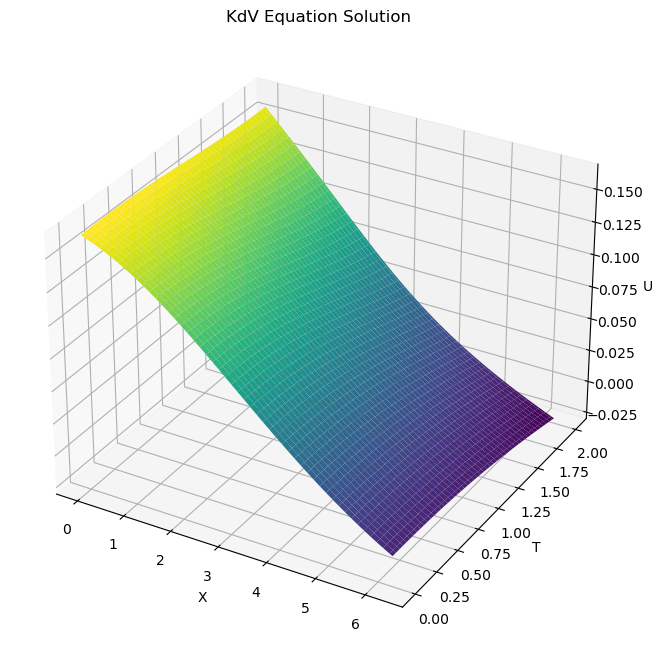

In [48]:
# Create the KdV PINN model and train it
kdv_pinn = KdV_PINN(N=100, tmax=2.0)  # Adjusted N and tmax for better control over grid size
kdv_pinn.train(n_iter=5000)

# Plot the results after training
kdv_pinn.plot_results()

Iteration: 0, Loss: 0.11493658274412155
Iteration: 100, Loss: 1.0154544725082815e-06
Iteration: 200, Loss: 5.592045226876508e-07
Iteration: 300, Loss: 4.279497716197511e-07
Iteration: 400, Loss: 3.2759697887740913e-07
Iteration: 500, Loss: 2.4329753500751394e-07
Iteration: 600, Loss: 1.7473303159931675e-07
Iteration: 700, Loss: 1.2158048434685043e-07
Iteration: 800, Loss: 8.219195279934866e-08
Iteration: 900, Loss: 5.420002580081018e-08
Iteration: 1000, Loss: 3.5084475769053824e-08
Iteration: 1100, Loss: 2.2537479438256014e-08
Iteration: 1200, Loss: 1.461337895136694e-08
Iteration: 1300, Loss: 9.799415501277053e-09
Iteration: 1400, Loss: 6.982791678211697e-09
Iteration: 1500, Loss: 5.389154456025835e-09
Iteration: 1600, Loss: 4.509927986617868e-09
Iteration: 1700, Loss: 4.027917555049498e-09
Iteration: 1800, Loss: 3.7580911715906495e-09
Iteration: 1900, Loss: 3.594549102814426e-09
Iteration: 2000, Loss: 3.4813592009186323e-09
Iteration: 2100, Loss: 3.392910397082005e-09
Iteration: 2200

Iteration: 18000, Loss: 1.1687640835589264e-05
Iteration: 18100, Loss: 1.1621708040365775e-09
Iteration: 18200, Loss: 4.836852585121676e-10
Iteration: 18300, Loss: 3.231259426694777e-10
Iteration: 18400, Loss: 1.080778133655258e-06
Iteration: 18500, Loss: 5.483922205229419e-10
Iteration: 18600, Loss: 3.382887303615689e-10
Iteration: 18700, Loss: 1.631707959859341e-07
Iteration: 18800, Loss: 1.0198685229667603e-09
Iteration: 18900, Loss: 4.182511004202638e-10
Iteration: 19000, Loss: 2.861713921387121e-10
Iteration: 19100, Loss: 9.463017249800032e-07
Iteration: 19200, Loss: 4.295971633982987e-10
Iteration: 19300, Loss: 2.8408511654198776e-10
Iteration: 19400, Loss: 1.4200599807168146e-08
Iteration: 19500, Loss: 3.383039681725819e-10
Iteration: 19600, Loss: 1.5501239181148208e-09
Iteration: 19700, Loss: 4.483288407186592e-09
Iteration: 19800, Loss: 3.25360904884775e-10
Iteration: 19900, Loss: 2.3075451272003278e-10
Iteration: 20000, Loss: 1.6449991369071881e-09
Iteration: 20100, Loss: 3.6

Iteration: 35700, Loss: 1.583472197808078e-08
Iteration: 35800, Loss: 1.0888789175877989e-10
Iteration: 35900, Loss: 1.248790626462437e-09
Iteration: 36000, Loss: 2.2056641235668195e-10
Iteration: 36100, Loss: 9.088327312944955e-11
Iteration: 36200, Loss: 4.343097316450439e-06
Iteration: 36300, Loss: 1.211584027549506e-10
Iteration: 36400, Loss: 8.77062658610761e-11
Iteration: 36500, Loss: 2.2139664679343696e-07
Iteration: 36600, Loss: 2.1355031631919985e-10
Iteration: 36700, Loss: 8.929441908112068e-11
Iteration: 36800, Loss: 7.689152092815732e-11
Iteration: 36900, Loss: 1.1013170375662185e-09
Iteration: 37000, Loss: 9.738789635838074e-11
Iteration: 37100, Loss: 7.668540802363566e-11
Iteration: 37200, Loss: 1.5321418800340325e-08
Iteration: 37300, Loss: 8.890894270807692e-11
Iteration: 37400, Loss: 7.570186838501414e-11
Iteration: 37500, Loss: 2.468878847139422e-06
Iteration: 37600, Loss: 1.9442548959691663e-10
Iteration: 37700, Loss: 8.920188199201817e-11
Iteration: 37800, Loss: 7.74

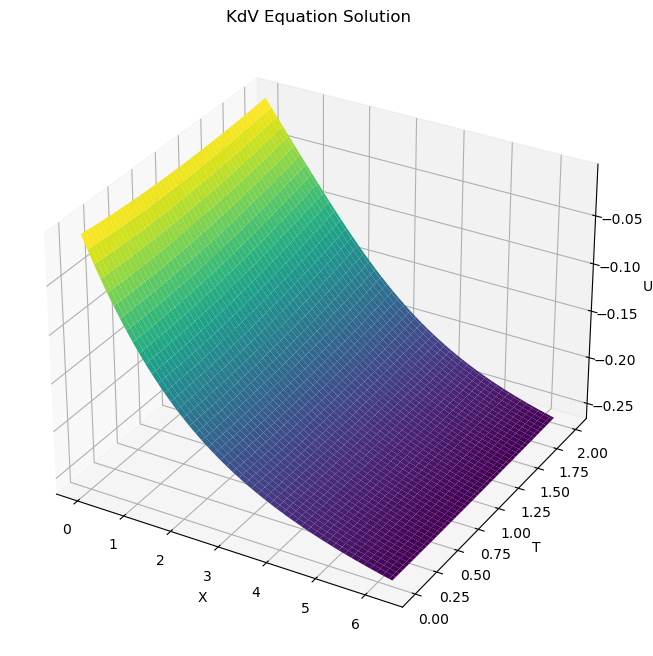

In [49]:
# Create the KdV PINN model and train it
kdv_pinn = KdV_PINN(N=100, tmax=2.0)  # Adjusted N and tmax for better control over grid size
kdv_pinn.train(n_iter=50000)

# Plot the results after training
kdv_pinn.plot_results()

Iteration: 0, Loss: 0.012890856713056564
Iteration: 100, Loss: 1.7761248045644606e-06
Iteration: 200, Loss: 8.479667030769633e-07
Iteration: 300, Loss: 4.522739516232832e-07
Iteration: 400, Loss: 2.87196257886535e-07
Iteration: 500, Loss: 2.0973706682525517e-07
Iteration: 600, Loss: 1.5979432532731153e-07
Iteration: 700, Loss: 1.2094902501758042e-07
Iteration: 800, Loss: 8.978067711495896e-08
Iteration: 900, Loss: 6.527577767201365e-08
Iteration: 1000, Loss: 4.6569539335905574e-08
Iteration: 1100, Loss: 3.273039084206175e-08
Iteration: 1200, Loss: 2.2805581423313015e-08
Iteration: 1300, Loss: 1.5899086491799608e-08
Iteration: 1400, Loss: 1.1221740869871155e-08
Iteration: 1500, Loss: 8.132324147425152e-09
Iteration: 1600, Loss: 6.119074580368533e-09
Iteration: 1700, Loss: 4.806052888994827e-09
Iteration: 1800, Loss: 3.937069781301261e-09
Iteration: 1900, Loss: 8.565377356717363e-05
Iteration: 2000, Loss: 5.665644842167694e-09
Iteration: 2100, Loss: 3.4749398913902496e-09
Iteration: 2200

Iteration: 17900, Loss: 5.792010204785925e-10
Iteration: 18000, Loss: 4.740977610495634e-10
Iteration: 18100, Loss: 4.388194807525281e-10
Iteration: 18200, Loss: 4.214003312963399e-10
Iteration: 18300, Loss: 4.085259908137573e-10
Iteration: 18400, Loss: 3.9758810133072586e-10
Iteration: 18500, Loss: 3.875493259641871e-10
Iteration: 18600, Loss: 3.782290869391858e-10
Iteration: 18700, Loss: 3.695452832630508e-10
Iteration: 18800, Loss: 3.6161498795372893e-10
Iteration: 18900, Loss: 3.543937088235083e-10
Iteration: 19000, Loss: 3.474891485666376e-10
Iteration: 19100, Loss: 3.4088235012497137e-10
Iteration: 19200, Loss: 3.347475630022245e-10
Iteration: 19300, Loss: 5.88008788326988e-08
Iteration: 19400, Loss: 3.448766272562409e-10
Iteration: 19500, Loss: 3.228791400911035e-10
Iteration: 19600, Loss: 9.635412112629638e-08
Iteration: 19700, Loss: 3.118176550298557e-10
Iteration: 19800, Loss: 2.9991059635747774e-10
Iteration: 19900, Loss: 3.299493733788239e-10
Iteration: 20000, Loss: 6.39571

Iteration: 35700, Loss: 4.5679713484014783e-11
Iteration: 35800, Loss: 1.4284100124939414e-08
Iteration: 35900, Loss: 5.718592613335183e-11
Iteration: 36000, Loss: 3.213509458532826e-10
Iteration: 36100, Loss: 9.089925256944298e-09
Iteration: 36200, Loss: 1.15650644616494e-09
Iteration: 36300, Loss: 9.391106642331337e-11
Iteration: 36400, Loss: 4.571998682423306e-11
Iteration: 36500, Loss: 4.78400874470708e-09
Iteration: 36600, Loss: 6.148712095033204e-11
Iteration: 36700, Loss: 7.049786532320468e-09
Iteration: 36800, Loss: 4.9601323048875656e-11
Iteration: 36900, Loss: 9.149598440005846e-11
Iteration: 37000, Loss: 4.913409679119241e-10
Iteration: 37100, Loss: 4.438711551091323e-11
Iteration: 37200, Loss: 3.850086915946349e-11
Iteration: 37300, Loss: 1.8061199114072224e-07
Iteration: 37400, Loss: 6.540272490251908e-11
Iteration: 37500, Loss: 7.74130803904427e-09
Iteration: 37600, Loss: 4.489306842936358e-11
Iteration: 37700, Loss: 1.9654896377119258e-08
Iteration: 37800, Loss: 4.315624

Iteration: 53400, Loss: 6.348252652721431e-12
Iteration: 53500, Loss: 1.973521346343432e-11
Iteration: 53600, Loss: 2.8425450881996994e-10
Iteration: 53700, Loss: 9.367607384236365e-12
Iteration: 53800, Loss: 6.974530761955089e-12
Iteration: 53900, Loss: 6.205169624656781e-12
Iteration: 54000, Loss: 5.92115115619074e-12
Iteration: 54100, Loss: 1.0236386044359946e-10
Iteration: 54200, Loss: 7.270788571905884e-12
Iteration: 54300, Loss: 6.2480693362176876e-12
Iteration: 54400, Loss: 5.878629180666728e-12
Iteration: 54500, Loss: 1.86505282329108e-08
Iteration: 54600, Loss: 6.274934565009271e-12
Iteration: 54700, Loss: 1.580503089515517e-11
Iteration: 54800, Loss: 9.684045232383198e-11
Iteration: 54900, Loss: 7.232594731454434e-12
Iteration: 55000, Loss: 5.817791994683352e-12
Iteration: 55100, Loss: 1.253076931106989e-08
Iteration: 55200, Loss: 7.729817654011928e-12
Iteration: 55300, Loss: 5.6505295234487996e-12
Iteration: 55400, Loss: 2.9400892387343447e-08
Iteration: 55500, Loss: 6.85409

Iteration: 71100, Loss: 7.928898071440926e-08
Iteration: 71200, Loss: 1.4358533459435385e-11
Iteration: 71300, Loss: 1.2237301449946614e-11
Iteration: 71400, Loss: 1.668565285939394e-09
Iteration: 71500, Loss: 1.2459895094851792e-11
Iteration: 71600, Loss: 1.2040110228261902e-11
Iteration: 71700, Loss: 2.7060924681632237e-11
Iteration: 71800, Loss: 1.2853853398331339e-11
Iteration: 71900, Loss: 1.236348783767438e-11
Iteration: 72000, Loss: 2.5206110532138837e-09
Iteration: 72100, Loss: 1.2973894528145458e-11
Iteration: 72200, Loss: 1.2465148704898787e-11
Iteration: 72300, Loss: 2.2317374614999608e-09
Iteration: 72400, Loss: 1.3425271311318099e-11
Iteration: 72500, Loss: 1.2690884801380697e-11
Iteration: 72600, Loss: 1.651296770432964e-07
Iteration: 72700, Loss: 1.5508101747219172e-11
Iteration: 72800, Loss: 1.2482698902305245e-11
Iteration: 72900, Loss: 1.4838248685311584e-11
Iteration: 73000, Loss: 5.0737941625911276e-11
Iteration: 73100, Loss: 1.2217096258260174e-11
Iteration: 73200,

Iteration: 88700, Loss: 5.037755812509204e-08
Iteration: 88800, Loss: 1.0192601103409249e-11
Iteration: 88900, Loss: 8.880609789208016e-12
Iteration: 89000, Loss: 3.95111188211672e-09
Iteration: 89100, Loss: 9.338524745161614e-12
Iteration: 89200, Loss: 8.856746065710741e-12
Iteration: 89300, Loss: 7.331126816723099e-09
Iteration: 89400, Loss: 8.958337543996109e-12
Iteration: 89500, Loss: 8.661179412561282e-12
Iteration: 89600, Loss: 8.932864448141231e-10
Iteration: 89700, Loss: 8.819408744975554e-12
Iteration: 89800, Loss: 8.55489377254992e-12
Iteration: 89900, Loss: 6.880966907374386e-10
Iteration: 90000, Loss: 8.827450055648445e-12
Iteration: 90100, Loss: 8.599132690634281e-12
Iteration: 90200, Loss: 8.414361221675826e-12
Iteration: 90300, Loss: 2.834394004225249e-11
Iteration: 90400, Loss: 8.47397846337472e-12
Iteration: 90500, Loss: 8.294237692496598e-12
Iteration: 90600, Loss: 2.98515906438368e-10
Iteration: 90700, Loss: 8.500723562565593e-12
Iteration: 90800, Loss: 8.31177487947

Iteration: 106400, Loss: 3.281720381553832e-12
Iteration: 106500, Loss: 4.3652848003006284e-10
Iteration: 106600, Loss: 3.285091816629393e-12
Iteration: 106700, Loss: 3.218198494150948e-12
Iteration: 106800, Loss: 9.501820441570885e-10
Iteration: 106900, Loss: 3.2199653100112302e-12
Iteration: 107000, Loss: 3.1444809863584444e-12
Iteration: 107100, Loss: 1.5895763594286905e-09
Iteration: 107200, Loss: 3.101203538760644e-12
Iteration: 107300, Loss: 3.0620443246948126e-12
Iteration: 107400, Loss: 2.1336826402929e-11
Iteration: 107500, Loss: 3.0303266406600526e-12
Iteration: 107600, Loss: 3.9470666318708325e-12
Iteration: 107700, Loss: 9.830256400555903e-12
Iteration: 107800, Loss: 2.94816189690128e-12
Iteration: 107900, Loss: 2.9079212995886117e-12
Iteration: 108000, Loss: 1.785172530632817e-11
Iteration: 108100, Loss: 2.8809699851445325e-12
Iteration: 108200, Loss: 2.8364437534844633e-12
Iteration: 108300, Loss: 4.7880407971767625e-11
Iteration: 108400, Loss: 2.825315502386072e-12
Itera

Iteration: 123700, Loss: 8.112265199866631e-13
Iteration: 123800, Loss: 6.130831953221616e-12
Iteration: 123900, Loss: 7.810901448204732e-13
Iteration: 124000, Loss: 7.721088850741464e-13
Iteration: 124100, Loss: 2.834877332880126e-10
Iteration: 124200, Loss: 8.829423737283237e-13
Iteration: 124300, Loss: 7.688792636427466e-13
Iteration: 124400, Loss: 7.611731882815886e-13
Iteration: 124500, Loss: 7.525569794067377e-13
Iteration: 124600, Loss: 7.501083088001792e-13
Iteration: 124700, Loss: 3.996443800891036e-12
Iteration: 124800, Loss: 7.377845079661882e-13
Iteration: 124900, Loss: 7.289370929780548e-13
Iteration: 125000, Loss: 9.22560031840769e-12
Iteration: 125100, Loss: 7.79937366860578e-13
Iteration: 125200, Loss: 7.166451676879348e-13
Iteration: 125300, Loss: 7.080952035658228e-13
Iteration: 125400, Loss: 8.910564885770966e-13
Iteration: 125500, Loss: 7.120119923341439e-13
Iteration: 125600, Loss: 7.030842379650293e-13
Iteration: 125700, Loss: 2.971664364234683e-12
Iteration: 1258

Iteration: 141100, Loss: 2.2700893627988078e-13
Iteration: 141200, Loss: 2.2533584969740977e-13
Iteration: 141300, Loss: 2.2429986741654556e-13
Iteration: 141400, Loss: 2.2301605007157832e-13
Iteration: 141500, Loss: 5.874689623652785e-10
Iteration: 141600, Loss: 2.651489867510487e-13
Iteration: 141700, Loss: 2.228949446889117e-13
Iteration: 141800, Loss: 2.2141729910055835e-13
Iteration: 141900, Loss: 2.2000229329272036e-13
Iteration: 142000, Loss: 1.7860497525390429e-09
Iteration: 142100, Loss: 2.2693689104551912e-13
Iteration: 142200, Loss: 2.1162664177488966e-13
Iteration: 142300, Loss: 2.1011817773978342e-13
Iteration: 142400, Loss: 2.0935901937860907e-13
Iteration: 142500, Loss: 2.0831815818796867e-13
Iteration: 142600, Loss: 1.065884741580092e-10
Iteration: 142700, Loss: 2.294224380784693e-13
Iteration: 142800, Loss: 2.1325421897117058e-13
Iteration: 142900, Loss: 2.1121175826106092e-13
Iteration: 143000, Loss: 2.0953834641793817e-13
Iteration: 143100, Loss: 2.079955538315456e-1

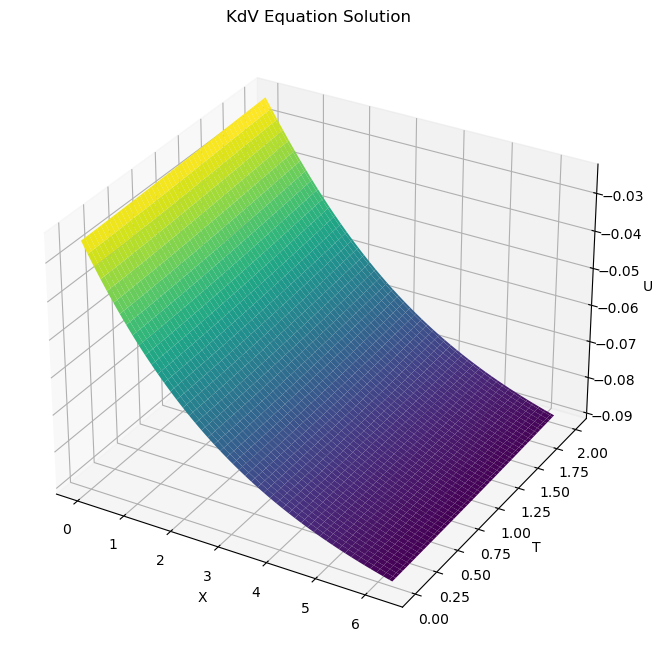

In [50]:
# Create the KdV PINN model and train it
kdv_pinn = KdV_PINN(N=100, tmax=2.0)  # Adjusted N and tmax for better control over grid size
kdv_pinn.train(n_iter=150000)

# Plot the results after training
kdv_pinn.plot_results()